In [1]:
#assignment 68

In [2]:
#ans 1:
import pandas as pd

url = 'https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
heart_disease_df = pd.read_csv(dwn_url)


In [3]:
heart_disease_df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
encoded_heart_disease_df = pd.get_dummies(heart_disease_df, columns=['cp'])


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
encoded_heart_disease_df[numerical_columns] = scaler.fit_transform(encoded_heart_disease_df[numerical_columns])


In [6]:
#ans 2:
from sklearn.model_selection import train_test_split

# Separate the target variable from the input features
X = encoded_heart_disease_df.drop(['target'], axis=1)
y = encoded_heart_disease_df['target']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
#ans 3:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees and max depth of 10
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training set
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [8]:
#ans 4:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target variable on the test set
y_pred = rfc.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))


Accuracy: 0.84
Precision: 0.83
Recall: 0.88
F1 score: 0.85


Top 5 features: Index(['ca', 'thal', 'oldpeak', 'thalach', 'cp_0'], dtype='object')


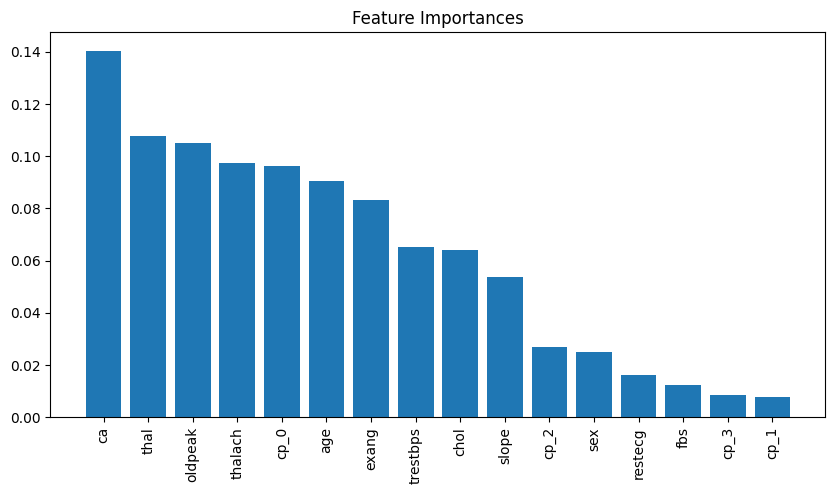

In [10]:
#ans 5:
import matplotlib.pyplot as plt

# Extract the feature importances
feature_importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Extract the top 5 most important features
top_5_features = X.columns[indices][:5]
print("Top 5 features:", top_5_features)

# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


In [12]:
#ans 6,7:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the performance of the tuned model
y_pred_tuned = grid_search.predict(X_test)
print("Accuracy (tuned):", accuracy_score(y_test, y_pred_tuned))
print("Precision (tuned):", precision_score(y_test, y_pred_tuned))
print("Recall (tuned):", recall_score(y_test, y_pred_tuned))
print("F1 score (tuned):", f1_score(y_test, y_pred_tuned))



Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (tuned): 0.8351648351648352
Precision (tuned): 0.8431372549019608
Recall (tuned): 0.86
F1 score (tuned): 0.8514851485148515


In [15]:
#ans 8:
from mlxtend.plotting import plot_decision_regions

feature_importances = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head())

X_train_2 = X_train[feature_importances.index[:2]]
X_test_2 = X_test[feature_importances.index[:2]]

plot_decision_regions(X_train_2.values, y_train.values, clf=best_rf, legend=2)

plt.xlabel(feature_importances.index[0])
plt.ylabel(feature_importances.index[1])
plt.title('Decision Boundary of Random Forest Classifier')
plt.show()
